In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# playerID       Player ID code
# yearID         Year
# stint          player's stint (order of appearances within a season)
# teamID         Team
# lgID           League
# G              Games
# AB             At Bats
# R              Runs
# H              Hits
# 2B             Doubles
# 3B             Triples
# HR             Homeruns
# RBI            Runs Batted In
# SB             Stolen Bases
# CS             Caught Stealing
# BB             Base on Balls
# SO             Strikeouts
# IBB            Intentional walks
# HBP            Hit by pitch
# SH             Sacrifice hits
# SF             Sacrifice flies
# GIDP           Grounded into double plays

In [4]:
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)

In [5]:
juiced = pd.read_csv("juiced.csv")
steroids = pd.read_csv("steroids.csv")

In [6]:
def remove_unnamed(df):
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    return df

In [7]:
steroids = remove_unnamed(steroids)
steroids.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abnersh01,1990,1,SDN,NL,91,184,17,45,9,...,15.0,2.0,3.0,9,28.0,1.0,2.0,2.0,1.0,3.0
1,aldremi01,1990,1,MON,NL,96,161,22,39,7,...,18.0,1.0,2.0,37,31.0,2.0,1.0,0.0,1.0,2.0
2,alomaro01,1990,1,SDN,NL,147,586,80,168,27,...,60.0,24.0,7.0,48,72.0,1.0,2.0,5.0,5.0,16.0
3,alomasa02,1990,1,CLE,AL,132,445,60,129,26,...,66.0,4.0,1.0,25,46.0,2.0,2.0,5.0,6.0,10.0
4,anderbr01,1990,1,BAL,AL,89,234,24,54,5,...,24.0,15.0,2.0,31,46.0,2.0,5.0,4.0,5.0,4.0


In [8]:
juiced = remove_unnamed(juiced)
juiced.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abreubo01,2014,1,NYN,NL,78,133,12,33,9,...,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0
1,abreujo02,2014,1,CHA,AL,145,556,80,176,35,...,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0
2,ackledu01,2014,1,SEA,AL,143,502,64,123,27,...,65.0,8.0,4.0,32,90.0,1.0,3.0,3.0,2.0,10.0
3,adamsma01,2014,1,SLN,NL,142,527,55,152,34,...,68.0,3.0,2.0,26,114.0,5.0,3.0,0.0,7.0,9.0
4,adducji02,2014,1,TEX,AL,44,101,13,17,3,...,8.0,3.0,1.0,10,27.0,0.0,0.0,1.0,2.0,2.0


In [9]:
print("Steroid Mean: {} \nSteroid StDev: {} \nJuice Mean: {} \nJuice StDev: {}".format(steroids.HR.mean(), 
                                                                                     juiced.HR.mean(),
                                                                                     steroids.HR.std(), 
                                                                                     juiced.HR.std()))

Steroid Mean: 10.395577820003455 
Steroid StDev: 11.461712732215677 
Juice Mean: 10.122573994956918 
Juice StDev: 9.532654065338109


In [10]:
t_stat, p_value = stats.ttest_ind(steroids['H'], juiced['H'], equal_var=False)

In [11]:
t_stat, p_value

(2.4493457342387512, 0.014352816461711874)

In [12]:
def t_stat_p_val_1(col_name):
    t_stat, p_value = stats.ttest_ind(steroids[col_name], juiced[col_name], equal_var=False)
    print('T-Stat: {} \nP-Value: {}'.format(t_stat, p_value))

In [13]:
def t_stat_p_val_2(col_name):
    t_stat, p_value = stats.ttest_ind(juiced[col_name], steroids[col_name], equal_var=False)
    print('T-Stat: {} \nP-Value: {}'.format(t_stat, p_value))

In [16]:
t_stat_p_val_1('H') #hits

T-Stat: 2.4493457342387512 
P-Value: 0.014352816461711874


In [17]:
t_stat_p_val_1('2B') #doubles

T-Stat: -0.023326832269210052 
P-Value: 0.9813907017728931


In [18]:
t_stat_p_val_1('HR') #home runs 

T-Stat: -4.393886471217105 
P-Value: 1.1407979205065639e-05


In [19]:
t_stat_p_val_1('SO') #strike outs 

T-Stat: -20.137596547351038 
P-Value: 2.4730525003046932e-85


In [20]:
#critical value 
deg = len(steroids) + len(juiced) - 2
crit_val = np.round(stats.t.ppf(1-0.05, df=deg), 5)
crit_val

1.64504

## *Ho*: Steroid Era players were better hitters

## *Ha*: Steroid Era players were not better hitters  

In [21]:
colname = 'H'
print("Steroid Mean: {} \nSteroid StDev: {} \nJuice Mean: {} \nJuice StDev: {}".format(steroids[colname].mean(), 
                                                                                     juiced[colname].mean(),
                                                                                     steroids[colname].std(), 
                                                                                     juiced[colname].std()))

Steroid Mean: 91.83036793919503 
Steroid StDev: 88.87902129587675 
Juice Mean: 49.55414799492732 
Juice StDev: 47.62552578782344


In [22]:
#Hit to At Bat ratio (batting avg)
juiced['AVG'] = juiced['H'] / juiced['AB']
steroids['AVG'] = steroids['H'] / steroids['AB'] 

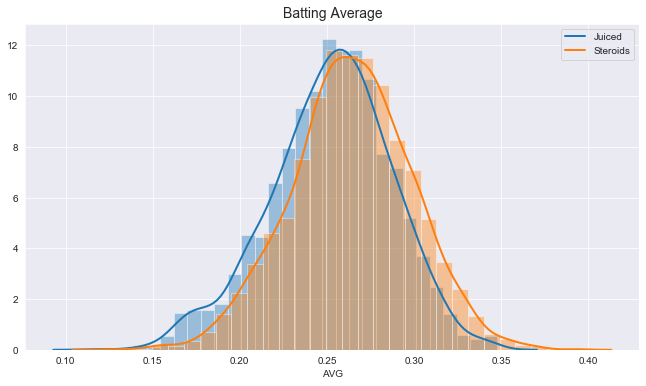

In [23]:
plt.figure(figsize=(11,6))
sns.distplot(juiced['AVG'], bins=30,kde_kws={"lw": 2, "label": "Juiced"})
sns.distplot(steroids['AVG'], bins=30,kde_kws={"lw": 2, "label": "Steroids"})
plt.title("Batting Average", fontsize=14);

In [24]:
t_stat_p_val_1('AVG')

T-Stat: 13.70934931371592 
P-Value: 7.8742099225483e-42


In [25]:
colname = 'H'
t_stat, p_value = stats.ttest_ind(steroids[colname], juiced[colname], equal_var=False)
t_stat, p_value

(2.4493457342387512, 0.014352816461711874)

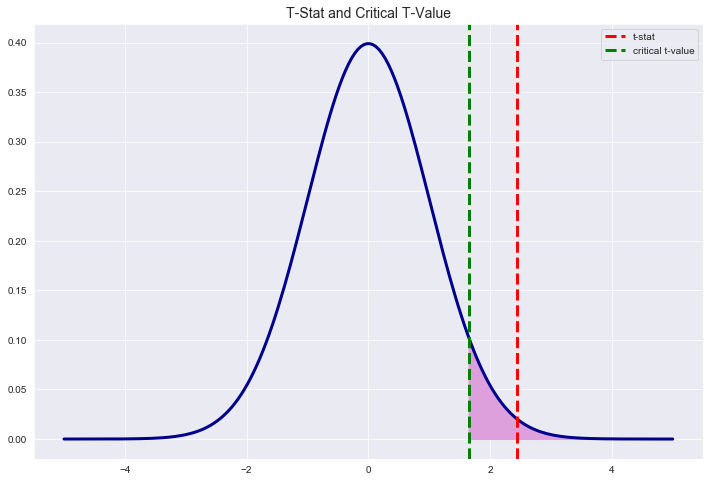

In [26]:
xs = np.linspace(-5, 5, 200)
ys = stats.t.pdf(xs, deg, 0, 1)

fig = plt.figure(figsize=(12,8))

ax = fig.gca()

ax.plot(xs, ys, linewidth=3, color='darkblue')

ax.axvline(t_stat, color='red', linestyle='--', lw=3,label='t-stat')

ax.axvline(crit_val,color='green',linestyle='--',lw=3,label='critical t-value')

ax.fill_betweenx(ys,xs,crit_val,where = xs > crit_val, color = 'plum')
plt.title('T-Stat and Critical T-Value', fontsize=14)
ax.legend()
plt.show()

## *Ho*: National League players have better batting averages

## *Ha*: American League players have better batting averages

In [30]:
NLSter = steroids[steroids['lgID']=='NL']
ALSter = steroids[steroids['lgID']=='AL']

NLJuice = juiced[juiced['lgID']=='NL']
ALJuice = juiced[juiced['lgID']=='AL']

In [31]:
NL = pd.concat([NLSter, NLJuice], ignore_index=True)
AL = pd.concat([ALSter, ALJuice], ignore_index=True)

In [32]:
print("NL Mean: {} \nNL StDev: {} \nAL Mean {} \nAL StDev: {}".format(NL.AVG.mean(),
                                                                  NL.AVG.std(),
                                                                  AL.AVG.mean(), 
                                                                  AL.AVG.std()))

NL Mean: 0.26161966136046516 
NL StDev: 0.03573001555296526 
AL Mean 0.2600010153517902 
AL StDev: 0.03508127199382807


In [33]:
#critical value 
league_deg = len(AL) + len(NL) - 2
league_crit_val = np.round(stats.t.ppf(1-0.05, df=league_deg), 5)
league_crit_val

1.64504

In [34]:
colname = 'AVG'
t_stat_2, p_value_2 = stats.ttest_ind(NL[colname], AL[colname], equal_var=False)
t_stat_2, p_value_2

(2.043912227022809, 0.0409949361619532)

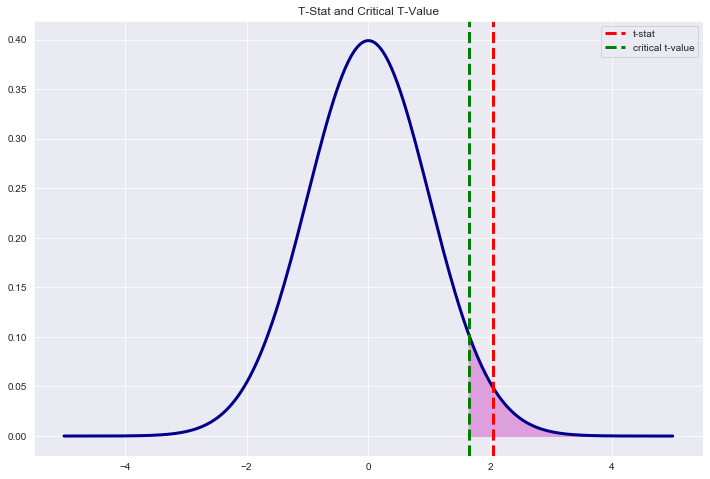

In [35]:
xs = np.linspace(-5, 5, 200)
ys = stats.t.pdf(xs, deg, 0, 1)

fig = plt.figure(figsize=(12,8))

ax = fig.gca()

ax.plot(xs, ys, linewidth=3, color='darkblue')

ax.axvline(t_stat_2, color='red', linestyle='--', lw=3,label='t-stat')

ax.axvline(league_crit_val,color='green',linestyle='--',lw=3,label='critical t-value')

ax.fill_betweenx(ys,xs,league_crit_val,where = xs > league_crit_val, color = 'plum')
plt.title('T-Stat and Critical T-Value')
ax.legend()
plt.show()